# Reconstruction of single unitaries with NNs

In [1]:
#libraries
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GaussianDropout
from tensorflow.keras import optimizers
import tensorflow as tf

In [2]:
#number of evolutions
num_unit=1000

# Theoretical values (if available)

In [3]:
th_mat=np.zeros([num_unit,4])
#select correct path
theta_th=np.loadtxt("dataset_gaussian//random_Theta.txt", dtype='f', delimiter='\t')
nx_th=np.loadtxt("dataset_gaussian//random_nx.txt", dtype='f', delimiter='\t')
ny_th=np.loadtxt("dataset_gaussian//random_ny.txt", dtype='f', delimiter='\t')
nz_th=np.loadtxt("dataset_gaussian//random_nz.txt", dtype='f', delimiter='\t')

In [10]:
#definition of fidelity function
def op_par(En,nx,ny,nz):
    mat=np.zeros([2,2],dtype=complex)
    
    mat[0,0]=np.cos(En) - 1j*np.sin(En)*nz
    mat[0,1]=-1j*np.sin(En)*(nx - 1j*ny)
    mat[1,0]=-1j*np.sin(En)*(nx + 1j*ny)
    mat[1,1]=np.cos(En) + 1j*np.sin(En)*nz
    
    return mat

def fidelity(mat1,mat2):
    prod=np.trace(np.dot(np.conjugate(mat1.T),mat2))
    
    return 0.5*np.abs(prod)

# Experimental data

In [5]:
LL = np.loadtxt("dataset_gaussian//LL.txt", dtype='f', delimiter='\t')
HH = np.loadtxt("dataset_gaussian//HH.txt", dtype='f', delimiter='\t') 
LD = np.loadtxt("dataset_gaussian//LD.txt", dtype='f', delimiter='\t')
LH = np.loadtxt("dataset_gaussian//LH.txt", dtype='f', delimiter='\t')
HD = np.loadtxt("dataset_gaussian//HD.txt", dtype='f', delimiter='\t')
HL = np.loadtxt("dataset_gaussian//HL.txt", dtype='f', delimiter='\t')

# 6 inputs prediction

Here and in the following, the models will be loaded with different names. If memory is an issue, save them with the same name.

In [6]:
json_file = open(r'./models/NN_qw_gen6opt.json', 'r') #path of NN 6 inputs json file
loaded_model_json = json_file.read()
json_file.close()
loaded_model6 = tf.keras.models.model_from_json(loaded_model_json)
loaded_model6.load_weights(r'./models/NN_qw_gen6opt.h5') #path of NN 6 inputs h5 file

In [ ]:
data6=np.zeros([num_unit,6])
data6[:,0]=LL
data6[:,1]=LH
data6[:,2]=LD
data6[:,3]=HL
data6[:,4]=HH
data6[:,5]=HD

In [11]:
y_pred6=loaded_model6.predict(data6)
theta_vect6=y_pred6[:,0]*np.pi
nx_vect6=y_pred6[:,1]*2 -1 
ny_vect6=(y_pred6[:,2]*2 -1)*np.sqrt(1-nx_vect**2)

nz_vect6=np.sqrt(abs(1-nx_vect**2-ny_vect**2))

# 5 inputs prediction

In [12]:
json_file = open(r'./models/NN_qw_gen5opt.json', 'r') #path of NN 5 inputs json file
loaded_model_json = json_file.read()
json_file.close()
loaded_model5 = tf.keras.models.model_from_json(loaded_model_json)
loaded_model5.load_weights(r'./models/NN_qw_gen5opt.h5') #path of NN 5 inputs h5 file

In [13]:
data5=np.zeros([num_unit,5])
data5[:,0]=LL
data5[:,1]=LH
data5[:,2]=LD
data5[:,3]=HH
data5[:,4]=HD

In [14]:
y_pred5=loaded_model5.predict(data5)
theta_vect5=y_pred5[:,0]*np.pi
nx_vect5=y_pred6[:,1]*2 -1 
ny_vect5=(y_pred6[:,2]*2 -1)*np.sqrt(1-nx_vect**2)

nz_vect5=np.sqrt(abs(1-nx_vect**2-ny_vect**2))

# 4 inputs prediction

In [15]:
json_file = open(r'./models/NN_qw_gen4opt.json', 'r') #path of NN 4 inputs json file
loaded_model_json = json_file.read()
json_file.close()
loaded_model4 = tf.keras.models.model_from_json(loaded_model_json)
loaded_model4.load_weights(r'./models/NN_qw_gen4opt.h5') #path of NN 4 inputs h5 file

In [16]:
data4=np.zeros([num_unit,4])
data4[:,0]=LL
data4[:,1]=LH
data4[:,2]=HH
data4[:,3]=HD

In [17]:
y_pred4=loaded_model4.predict(data4)
theta_vect4=y_pred4[:,0]*np.pi
nx_vect4=y_pred6[:,1]*2 -1 
ny_vect4=(y_pred6[:,2]*2 -1)*np.sqrt(1-nx_vect**2)

nz_vect4=np.sqrt(abs(1-nx_vect**2-ny_vect**2))

# 3 inputs prediction

In [18]:
json_file = open(r'./models/NN_qw_gen3opt.json', 'r') #path of NN 3 inputs json file
loaded_model_json = json_file.read()
json_file.close()
loaded_model3 = tf.keras.models.model_from_json(loaded_model_json)
loaded_model3.load_weights(r'./models/NN_qw_gen3opt.h5') #path of NN 3 inputs h5 file

In [19]:
data3=np.zeros([num_unit,3])
data3[:,0]=LL
data3[:,1]=LH
data3[:,2]=HD

In [20]:
y_pred3=loaded_model3.predict(data3)
theta_vect3=y_pred3[:,0]*np.pi
nx_vect3=y_pred6[:,1]*2 -1 
ny_vect3=(y_pred6[:,2]*2 -1)*np.sqrt(1-nx_vect**2)

nz_vect3=np.sqrt(abs(1-nx_vect**2-ny_vect**2))

# Fidelity (if theoretical values are available)

In [21]:
Fvals=np.zeros([4,num_unit])

for i in range(num_unit):
    netU=op_par(theta_vect3[i],nx_vect3[i],ny_vect3[i],nz_vect3[i])
    thU=op_par(theta_th[i],nx_th[i],ny_th[i],nz_th[i])
    Fvals[0,i]=fidelity(netU,thU)
    
for i in range(num_unit):
    netU=op_par(theta_vect4[i],nx_vect4[i],ny_vect4[i],nz_vect4[i])
    thU=op_par(theta_th[i],nx_th[i],ny_th[i],nz_th[i])
    Fvals[1,i]=fidelity(netU,thU)
    
for i in range(num_unit):
    netU=op_par(theta_vect5[i],nx_vect5[i],ny_vect5[i],nz_vect5[i])
    thU=op_par(theta_th[i],nx_th[i],ny_th[i],nz_th[i])
    Fvals[2,i]=fidelity(netU,thU)
    
for i in range(num_unit):
    netU=op_par(theta_vect6[i],nx_vect6[i],ny_vect6[i],nz_vect6[i])
    thU=op_par(theta_th[i],nx_th[i],ny_th[i],nz_th[i])
    Fvals[3,i]=fidelity(netU,thU)

In [35]:
Fmean=np.array([np.mean(Fvals[0]),np.mean(Fvals[1]),np.mean(Fvals[2]),np.mean(Fvals[3])])
Fstd=np.sqrt([np.var(Fvals[0]),np.var(Fvals[1]),np.var(Fvals[2]),np.var(Fvals[3])])

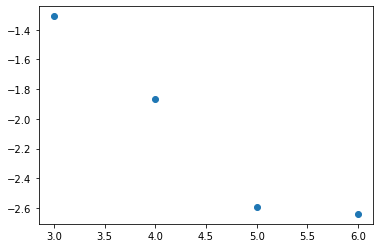

In [36]:
#infidelity plot (log)
plt.scatter(np.arange(3,7,1),np.log10(1-Fmean))

(0.0, 0.2)

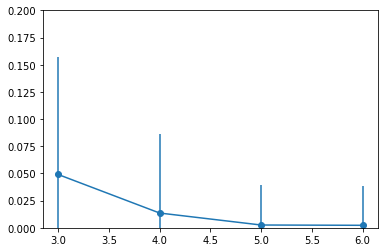

In [39]:
#infidelity plot (linear with error bars)
plt.scatter(np.arange(3,7,1),1-Fmean)
plt.errorbar(np.arange(3,7,1),1-Fmean,Fstd)
plt.ylim([0,0.2])

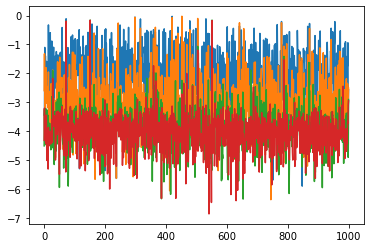

In [25]:
plt.plot(np.log10(1-Fvals[0]))
plt.plot(np.log10(1-Fvals[1]))
plt.plot(np.log10(1-Fvals[2]))
plt.plot(np.log10(1-Fvals[3]))